# Training notebook

In [1]:
import utils
import model

In [2]:
# set dataset to use
dataset_name = 'facades'

In [3]:
# instantiate datasets and dataloaders
datasets = {mode: utils.ImageDataset(dataset_name = dataset_name, transform=utils.data_transforms[mode], mode = mode) for mode in ['train', 'val']}
dataloaders = {mode: utils.DataLoader(datasets[mode], batch_size=1, shuffle=True) for mode in ['train', 'val']}

In [4]:
# instantiate model
p2p = model.Pix2Pix().to(utils.device)

In [5]:
import torch
from torch.autograd import Variable

In [6]:
lbd = 100

def generator_loss(disc_generated_output, gen_output, real):
    gan_loss = torch.nn.BCEWithLogitsLoss()(Variable(torch.ones_like(disc_generated_output)), disc_generated_output)
    l1_loss = torch.mean(torch.abs(real - gen_output))
    total_gen_loss = gan_loss + (lbd * l1_loss)
    return total_gen_loss, gan_loss, l1_loss

def discriminator_loss(disc_real_output, disc_generated_output):
    real_loss = torch.nn.BCEWithLogitsLoss()(Variable(torch.ones_like(disc_real_output)), disc_generated_output)
    generated_loss = torch.nn.BCEWithLogitsLoss()(Variable(torch.zeros_like(disc_generated_output)), disc_generated_output)
    total_disc_loss = real_loss + generated_loss
    return total_disc_loss

In [7]:
model = p2p

In [8]:
input, real = next(iter(dataloaders['train']))

In [9]:
input = input.to(utils.device)
real = real.to(utils.device)

In [10]:
# we first update discriminator
gen_output = model.generator(input)
disc_real_output = model.discriminator(input, real)
disc_generated_output = model.discriminator(input, gen_output)
disc_loss = discriminator_loss(disc_real_output, disc_generated_output)
gen_total_loss, gen_gan_loss, gen_l1_loss = generator_loss(disc_generated_output, gen_output, real)

In [11]:
print(gen_total_loss)

tensor(39.5354, device='cuda:0', grad_fn=<AddBackward0>)


In [12]:
print(disc_loss)

tensor(1.0694, device='cuda:0', grad_fn=<AddBackward0>)


In [13]:
print(gen_gan_loss)

tensor(0.3762, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


In [14]:
print(gen_l1_loss)

tensor(0.3916, device='cuda:0', grad_fn=<MeanBackward0>)


In [15]:
utils.train(model = p2p, n_epochs = 10, dataloader = dataloaders['train'])

Epoch 1/10
----------
  1/400: [>...............................] - ETA 0.0sgen_total_loss: 30.6872, gen_gan_loss: -0.6489, gen_l1_loss: 0.3134, disc_loss: 1.0982.
  2/400: [>...............................] - ETA 78.2sgen_total_loss: 39.9507, gen_gan_loss: -1.4753, gen_l1_loss: 0.4143, disc_loss: 0.0373.
  3/400: [>...............................] - ETA 78.0sgen_total_loss: 52.4725, gen_gan_loss: -2.1585, gen_l1_loss: 0.5463, disc_loss: -0.5191.
  4/400: [>...............................] - ETA 77.8sgen_total_loss: 35.1666, gen_gan_loss: -3.0324, gen_l1_loss: 0.3820, disc_loss: -1.5524.
  5/400: [>...............................] - ETA 77.7sgen_total_loss: 29.4213, gen_gan_loss: -3.1903, gen_l1_loss: 0.3261, disc_loss: -1.8725.
  6/400: [>...............................] - ETA 77.5sgen_total_loss: 37.3012, gen_gan_loss: -4.5133, gen_l1_loss: 0.4181, disc_loss: -3.0001.
  7/400: [>...............................] - ETA 77.3sgen_total_loss: 40.1529, gen_gan_loss: -5.3334, gen_l1_loss: 0

KeyboardInterrupt: 

In [6]:
input, real = next(iter(dataloaders['val']))

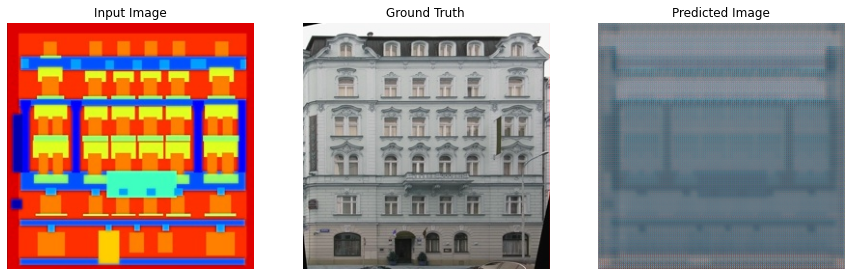

In [7]:
utils.generate_images(model = p2p, input = input, real = real)

In [9]:
prediction = p2p.generator(input.to(utils.device))

(array([67024., 26910.,  8885.,  6398.,  9244.,  4710.,  2321.,  5283.,
        17592., 48241.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32),
 <BarContainer object of 10 artists>)

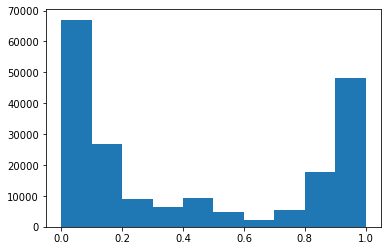

In [21]:
utils.plt.hist(0.5 * input[0].detach().cpu().numpy().flatten() + 0.5)

(array([15571.,  6795., 14398., 29395., 27719., 35844., 41945., 15114.,
         6704.,  3123.]),
 array([0.        , 0.09647059, 0.19294117, 0.28941175, 0.38588235,
        0.48235294, 0.5788235 , 0.6752941 , 0.7717647 , 0.8682353 ,
        0.9647059 ], dtype=float32),
 <BarContainer object of 10 artists>)

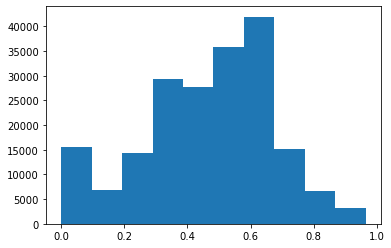

In [22]:
utils.plt.hist(0.5 * real[0].detach().cpu().numpy().flatten() + 0.5)

(array([  464.,  4406., 21876., 61823., 56902., 20357., 15163., 13344.,
         2189.,    84.]),
 array([0.06217968, 0.14994515, 0.23771062, 0.32547608, 0.41324157,
        0.501007  , 0.5887725 , 0.67653793, 0.76430345, 0.8520689 ,
        0.93983436], dtype=float32),
 <BarContainer object of 10 artists>)

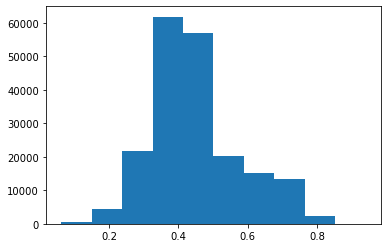

In [20]:
utils.plt.hist(0.5 * prediction[0].detach().cpu().numpy().flatten() + 0.5)